In [35]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

X = df.iloc[0:100, [0,2]].values

y = df.iloc[0:100, 4].values #iloc: pandas의 함수로, 특정 행,열을 선택
y = np.where(y == 'Iris-setosa', -1, 1)

### 2-2: 적응형 선형 뉴런(ADALINE, Adaptive Linear Neuron)

-------

#### 1. 아달린  

아달린은 연속 함수(Continuous function)로 비용 함수를 정의, 최소화한다.  
아달린과 퍼셉트론의 가장 큰 차이점은 가중치를 업데이트하는데 단위 계단 함수 대신 선형 활성화 함수를 사용하는 것이다.  
선형 활성화 함수 $\phi(z)$는 최종 입력과 동일한 함수이다.  
$$
\phi(\boldsymbol{w}^{T}\boldsymbol{x}) = \boldsymbol{w}^{T}\boldsymbol{x}
$$  

아달린 알고리즘은 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교  
vs
퍼셉트론은 진짜 클래스 레이블과 예측 클래스 레이블을 비교

---
#### 2. 목적 함수(Object Function), 경사 하강법(Gradient Descent)  

지도 학습 알고리즘의 핵심 구성 요소는 학습 과정 동안 최적화하기 위해 정의한 **목적 함수**이다.  
아달린의 목적 함수는 계산된 출력과 진짜 클래스 레이블 사이의 **제곱 오차합**(SSE, Sum of Squared Errors)으로 정의된 비용 함수 $J$이다.

$$
J(\boldsymbol{w}) = {1\over2}\sum_{i} (y^{(i)}-\phi(z^{(i)}))^2
$$

$1\over2$항은 gradient를 간소화하기 위해 편의상 추가  
단위 계단 함수 대신 선형 활성화 함수를 사용함으로써 비용 함수가 미분 가능해지고, 볼록 함수여서 경사 하강법 사용 가능  
<br/>  
**아달린 학습 규칙**

$$\boldsymbol{w} := \boldsymbol{w}+\Delta \boldsymbol{w}$$

가중치 변화량 $\Delta w$는 음수의 그래디언트에 학습률 $\eta$를 곱한 것으로 정의

$$\Delta \boldsymbol{w} = -\eta \nabla \boldsymbol{J}(\boldsymbol{w})$$

비용 함수의 그래디언트를 계산하려면 각 가중치 $w_j$에 대한 편도 함수를 계산

$${\partial J\over\partial w_j} = -\sum_{i} (y^{(i)}-\phi(z^{(i)}))  x_j^{(i)}$$


 <img src="2-2_image/image1.jpeg" width="60%" height="60%" title="image1"></img>

$$\Delta w_j = -\eta{\partial J\over \partial w_j} = \eta \sum_{i} (y^{(i)}-\phi(z^{(i)})) x_j^{(i)}$$

모든 가중치가 동시 업데이트되므로 아달린 학습 규칙은

$$\boldsymbol{w} := \boldsymbol{w} + \Delta \boldsymbol{w}$$

아달린 학습 규칙이 퍼셉트론과 동일하게 보이나 $z^{(i)} = \boldsymbol{w}^{T}\boldsymbol{x}^{(i)}$인 $\phi(x^{(i)})$는 정수 클래스 레이블이 아닌 실수  
훈련 세트에 있는 모든 샘플을 기반으로 가중치를 업데이트(각 샘플마다 업데이트X)  
이 방법을 **배치 경사 하강법**(Batch Gradient Descent)라고 함  


---
#### 3. 파이썬으로 아달린 구현

2-1에서 정의한 퍼셉트론 구현에서 fit 메서드를 바꾸어 구현

In [36]:
import numpy as np

class AdalineGD(object):
  """적응형 선형 뉴런 분류기

  매개변수
  ------------
  eta : float
    learning rate(0.0 ~ 1.0)

  n_iter : int
    훈련 데이터셋 반복 횟수

  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드


  속성
  ------------
  w_ : 1d-array
    학습된 가중치

  costs_ : list
    epoch마다 누적된 비용 함수의 제곱합

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    """훈련 데이터 학습

    매개변수
    ------------
    X : {array-like}, shape = [n_samples, n_features]
     n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    
    y : array-like, shape = [n_samples]
     타깃 값

    반환 값
    ------------
    self : object

    """
    rgen = np.random.RandomState(seed = self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self ,X):
    """선형 활성화 계산"""
    return X
    
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)


fit메서드를 따로 놓고 보자.

```python
def fit(self,X,y):
    rgen = np.random.RandomState(seed = self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)

    return self
```

개별 훈련 샘플마다 평가 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 그래디언트를 계산

가중치 업데이트 공식: $\Delta w_j = \eta \sum_{i} (y^{(i)}-\phi(z^{(i)})) x_j^{(i)}$  
<br/>  
`self.w_[1:]` : errors가 오차의 합, x와 dot product  
intercept(`self.w_[0]`) : $w_0$에 대한 gradient는 $x_0$가 1

activation 메서드: 항등 함수, 활성화 함수를 표현

`self.cost_` 리스트에 비용(J)을 모음
<br/>  
최적 학습률 $\eta$를 찾기 위해 학습률 $\eta = 0.01$과 $\eta = 0.0001$에서의 비용 그래프를 도시 

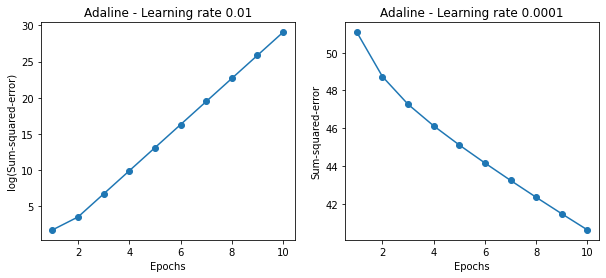

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

왼쪽 그래프는 학습률이 너무 커 비용 함수를 최소화하지 못하고 오차가 점점 증가
오른쪽 그래프는 학습률이 너무 작아 많은 에포크가 필요  

---------------

#### 4. 특성 스케일 조정  

알고리즘의 최적의 성능을 위해 특성 스케일을 조정  
<br>/
아달린에는 **표준화**(Standardization)를 사용

$$\boldsymbol{x'}_j = {\boldsymbol{x}_j - \mu_j\over \sigma_j}$$

표준화가 경사 하강법 학습에 도움이 되는 이유는 거치는 단계를 줄여주기 떄문

/var/folders/93/wz9d35t12bggw18wk6g_80j80000gn/T/ipykernel_17151/4222819565.py:37: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor = 'black')


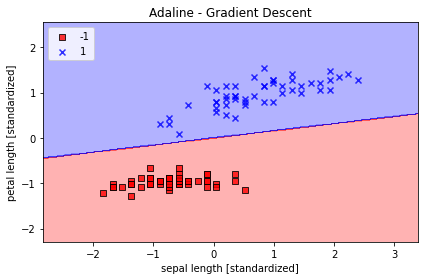

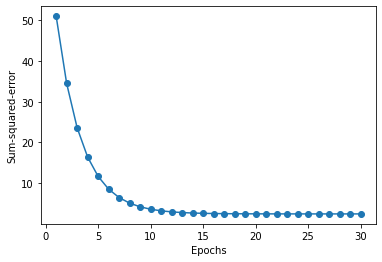

In [38]:
from matplotlib.colors import ListedColormap

#Standardization
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

#표준화된 샘플로 아달린 모델 훈련
ada = AdalineGD(n_iter=30, eta=0.01).fit(X_std,y)

#도시
def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v') # 사각형, 곱셈 기호, 원, 삼각형, 뒤집힌 삼각형
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # unique: numpy함수로, 고유값 반환

    # 결정 경계(Decision Boundary) 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    #ravel: 1차원으로 만들어주는 numpy 함수
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    #contourf: python함수, 2차원 등고선 플롯/ alpha: 투명도/ cmap: Colormap, 레벨 값을 색에 매핑 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor = 'black')

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.show()


아달린 모델이 수렴하였다.  
모든 샘플이 완벽하게 분류되더라도 SSE는 0이 되지 않는다.

----

#### 5. 확률적 경사 하강법(Stochastic gradient descent)

배치 경사 하강법은 단계마다 전체 훈련 데이터셋을 다시 평가하기 때문에 계산 비용이 높음  
이 대안으로 **확률적 경사 하강법**을 사용  <br/>  
batch gradient descent:  
$$\Delta\boldsymbol{w} = \eta \sum_{i}(y^{(I)}-\phi(z^{(i)}))\boldsymbol{x}^{(i)}$$
stochastic gradient descent:
$$\Delta\boldsymbol{w} = \eta (y^{(I)}-\phi(z^{(i)}))\boldsymbol{x}^{(i)}$$ 
<br/> 모든 샘플 $\boldsymbol{x}$에 대해 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 각 훈련 샘플에 대해 가중치 업데이트  
가중치가 자주 업데이트되므로 수렴속도가 빠르고, 오차의 궤적이 어지러움  
훈련 샘플 순서를 무작위하게 주입하는 것이 중요  
온라인 학습으로 사용할 수 있다(훈련 데이터가 도착하는 대로 훈련 가능)

구현:

In [49]:
class AdalineSGD(object):
  """적응형 선형 뉴런 분류기

  매개변수
  ------------
  eta : float
    learning rate(0.0 ~ 1.0)

  n_iter : int
    훈련 데이터셋 반복 횟수

  shuffle : bool (default: True)
    True로 설정 시 epoch마다 훈련 데이터를 섞는다

  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드


  속성
  ------------
  w_ : 1d-array
    학습된 가중치

  costs_ : list
    epoch마다 누적된 비용 함수의 제곱합

  """
  def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self,X,y):
    """훈련 데이터 학습

    매개변수
    ------------
    X : {array-like}, shape = [n_samples, n_features]
     n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    
    y : array-like, shape = [n_samples]
     타깃 값, 1 or -1

    반환 값
    ------------
    self : object

    """
    self._initialize_weights(X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)

    return self

  def partial_fit(self, X, y):
    """가중치를 다시 초기화하지 않고 훈련 데이터 학습
    
    매개변수
    ------------
    X : {array-like}, shape = [n_samples, n_features]
     n_samples개의 샘플과 n_features개의 특성으로 이루어진 새롭게 추가할 훈련 데이터
    
    y : array-like, shape = [n_samples]
     새롭게 추가할 타깃 값, 1 or -1

    반환 값
    ------------
    self : object

    """
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])

    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    
    return self

  def _shuffle(self, X, y):
    """훈련 데이터를 섞습니다"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    """랜덤한 작은 수로 가중치 초기화"""
    self.rgen = np.random.RandomState(seed = self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """아달린 학습 규칙을 적용하여 가중치 업데이트"""
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = (error**2).sum() / 2.0
    return cost

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self ,X):
    """선형 활성화 계산"""
    return X
    
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

_shuffle 메서드: np.random 모듈의 permutation함수로 0~100 까지의 중복되지 않은 랜덤 숫자 시퀀스 생성, 셔플 인덱스로 사용<br/>  
partial_fit 메서드: 새로운 입력을 추가할 때(Online learning) 추가할 샘플마다 호출  
ex) `ada.partial_fit(X_std[0,:], y[0])`

/var/folders/93/wz9d35t12bggw18wk6g_80j80000gn/T/ipykernel_17151/4222819565.py:37: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor = 'black')


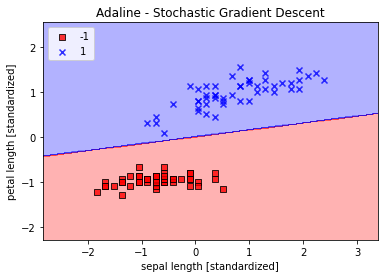

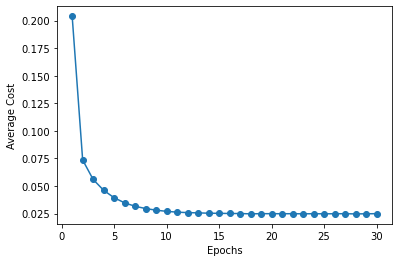

In [50]:
#AdalineSGD 그래프 도시
ada = AdalineSGD(n_iter = 30, eta = 0.01, random_state = 1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1,len(ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()


평균 비용이 빠르게 감소하는 모습을 볼 수 있다.